<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 171.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 175.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 91.4 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


Text(0, 0.5, 'Distribution')

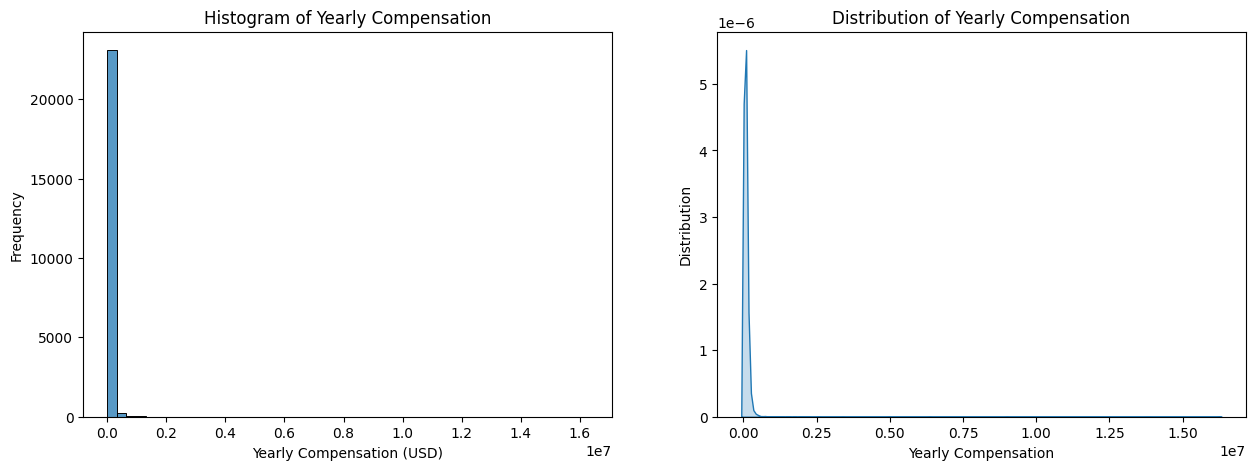

In [4]:
# 1. Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# 2. Plot the histogram on the first subplot
sns.histplot(df['ConvertedCompYearly'], kde=False, bins=50, ax=axes[0])
axes[0].set_title('Histogram of Yearly Compensation')
axes[0].set_xlabel('Yearly Compensation (USD)')
axes[0].set_ylabel('Frequency')
# 3. Plot the distribution (KDE) on the second subplot
sns.kdeplot(df['ConvertedCompYearly'], fill=True, ax = axes[1]) 
axes[1].set_title('Distribution of Yearly Compensation') 
axes[1].set_xlabel('Yearly Compensation')
axes[1].set_ylabel('Distribution')

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [7]:
employed_fulltime = df[df['Employment'] == 'Employed, full-time']
median_comp = employed_fulltime['ConvertedCompYearly'].median()
print(f"The median compensation for respondents employed full-time is: ${median_comp:,.2f}")

The median compensation for respondents employed full-time is: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



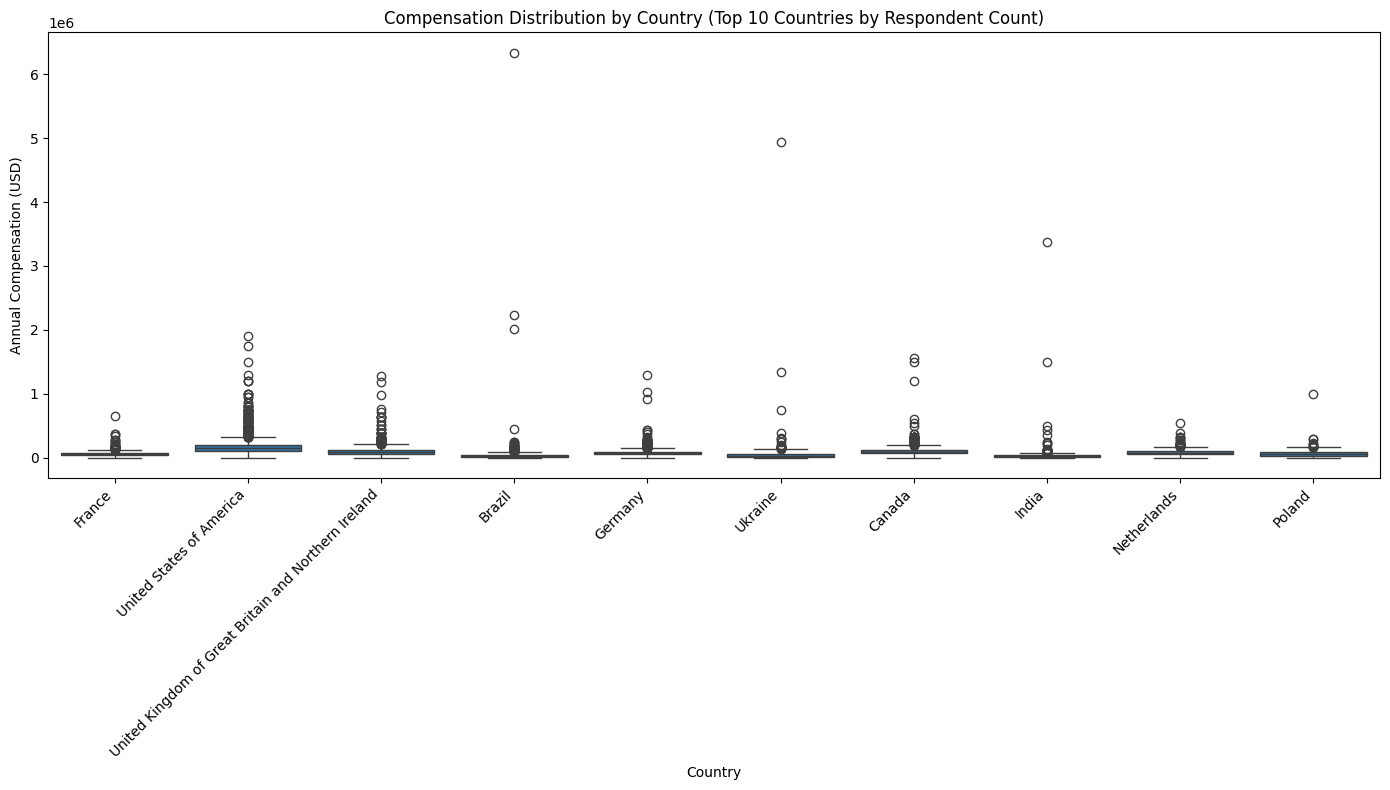


Descriptive Statistics of Annual Compensation by Country:
                                                     count           mean  \
Country                                                                     
Brazil                                               685.0   51216.227737   
Canada                                               871.0  102348.691160   
France                                               918.0   62761.198257   
Germany                                             2046.0   77054.550831   
India                                               1037.0   30513.611379   
Netherlands                                          561.0   82317.967914   
Poland                                               586.0   61901.534130   
Ukraine                                             1474.0   39455.767300   
United Kingdom of Great Britain and Northern Ir...  1391.0  102603.315600   
United States of America                            4677.0  161072.335685   

                

In [9]:
# Filter out rows where 'ConvertedCompYearly' is NaN or zero
df_filtered = df[df['ConvertedCompYearly'].notna()]
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] > 0]

# Get the count of respondents for each country
country_counts = df_filtered['Country'].value_counts()

# Sort the countries by the number of respondents in descending order
top_n = 10
top_countries = country_counts.nlargest(top_n).index
df_top_countries = df_filtered[df_filtered['Country'].isin(top_countries)]

# Create box plots to compare compensation distributions across the top N countries
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)
plt.title(f'Compensation Distribution by Country (Top {top_n} Countries by Respondent Count)')
plt.xlabel('Country')
plt.ylabel('Annual Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Further analysis: Descriptive statistics for each country
compensation_stats = df_top_countries.groupby('Country')['ConvertedCompYearly'].describe(percentiles=[0.25, 0.50, 0.75])
print("\nDescriptive Statistics of Annual Compensation by Country:")
print(compensation_stats)

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [10]:
# Identify outliers using the IQR method
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers in 'ConvertedCompYearly'
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)].copy()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)
print("\nFirst few rows of the DataFrame without outliers:")
print(df_no_outliers.head())

Original DataFrame shape: (65437, 114)
DataFrame shape after removing outliers: (22457, 114)

First few rows of the DataFrame without outliers:
     ResponseId                                         MainBranch  \
72           73                     I am a developer by profession   
374         375  I am not primarily a developer, but I write co...   
379         380                     I am a developer by profession   
385         386                     I am a developer by profession   
389         390                     I am a developer by profession   

                 Age                                         Employment  \
72   18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374  25-34 years old                                Employed, full-time   
379  35-44 years old                                Employed, full-time   
385  35-44 years old  Independent contractor, freelancer, or self-em...   
389  25-34 years old             Employed, full-time;Student

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [ ]:
# Select the columns for correlation analysis
correlation_data = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].copy()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Annual Compensation, Work Experience, and Job Satisfaction')
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [ ]:
## Write your code here

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
